# Multiple ray tracing steps #
This is a demonstration file for PH455/957. It shows you how to implement multiple ray tracing steps.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import PH455

### (1) Define the input ray: [y, theta]

In [55]:
rayIn    = np.array( [2, 0.2] )    # ray at height 2mm and angle 0.2 rad
zIn      = 0                       # for position 

### (2) Define the ray-transfer matrices for four steps. 
- All matrixces represent spatial propagation by distances d1,d2,d3,d4 in this example.

In [57]:
d1  = 5                          
M1  = np.array( [[1,d1],[0,1]] ) 

d2  = 3                          
M2  = np.array( [[1,d2],[0,1]] ) 

d3  = 6                          
M3  = np.array( [[1,d3],[0,1]] ) 

d4  = 3                          
M4  = np.array( [[1,d4],[0,1]] ) 

### (3) Propagate the ray through the system
- rayVect and zVect are lists that keep track of the ray parameters at the z positions.

Initialize empty position and parameter vectors and append them to the variables zList and rayList. Those lists are used to store the parameters as the ray propagates through the system.

In [59]:
zList    = []
rayList  = []

rayList.append(rayIn)
zList.append(zIn)

Propagate by one step with M1. 
- Calculate the new ray parameters and the new position.
- Use the numpy command `matmul` to multiply the matrix `M1` with `rayList[-1]`
- `rayList[-1]` uses the last element in the list `rayList`. At the moment, there is only a single element in the list.
- The same is true for `zList[-1]`. The `z` position of the ray is shifted by `d1`.
- Append the results to the lists which store positions and ray parameters.

In [61]:
ray = np.matmul(M1, rayList[-1])

rayList.append(ray)    
zList.append(zList[-1] + d1)

Repeat the propagation steps for M2,M3,M4.

In [63]:
rayList.append(np.matmul(M2, rayList[-1]))    
zList.append(zList[-1] + d2)

rayList.append(np.matmul(M3, rayList[-1]))    
zList.append(zList[-1] + d3)

rayList.append(np.matmul(M4, rayList[-1]))    
zList.append(zList[-1] + d4)

### (3) Plot the ray 
- Use the the command "showRay( zList, rayList )" in the support module PH455.
- zList and rayList contain the z-positions and ray parameters
- vertical gray lines show the z-positions
- horizontal gray line shows the optical axis
- red circles provided y-positions of rays
- dashed red lines indicate ray between two points
- dashed blue lines indicate angle of input and output rays

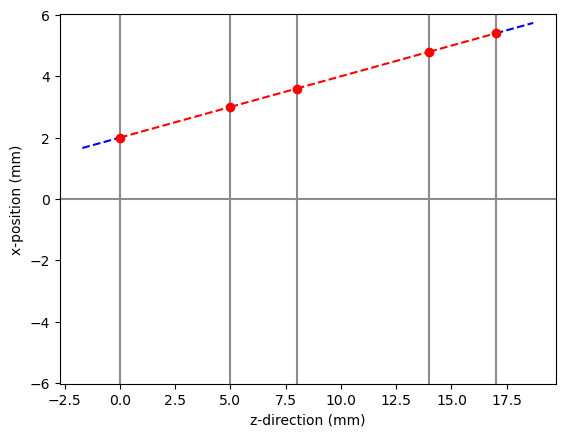

In [74]:
PH455.showRay( zList, rayList )

## Task
Change the matrices `M1,M2,M3,M4` to describe the following situation:
- The rays propagate in air for 2mm
- until they enter a medium with refractive index n=2.4.
- The rays propagate in that medium for 3mm 
- until they exit back to air.